In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from experiments.configs.classification_consts import VALID_UQ_METHODS, VALID_ESTIMATORS, MODELS, DATASETS, SINGLE_CONFORMAL_METHODS
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,              # Use TeX for text rendering
    "font.family": "serif",
    "hatch.color": "white"
})
%load_ext autoreload
%autoreload 2

In [2]:

def convert_results_to_df(results_dict):
   
    df = pd.DataFrame.from_dict(
        {(dataset, method, hyperparam): metrics
        for dataset, methods in results_dict.items()
        for (method, hyperparam), metrics in methods.items()},
        orient='index'
    )

    # Convert index into MultiIndex
    df.index = pd.MultiIndex.from_tuples(df.index, names=['Dataset', 'Method', 'Estimator'])

    # Reset index to move 'Dataset' to a normal column
    df = df.reset_index()

    # Pivot table to reshape
    df = df.pivot(index="Dataset", columns=["Method", "Estimator"])

    # Fix column ordering
    df.columns = df.columns.reorder_levels([1, 2, 0])  # Move metric to last level
    df = df.sort_index(axis=1)  # Sort for readability
    return df

In [4]:
train_size = 0.8
#dataset_results = [pickle.load(open(f'../results/classification/aggregated_results/{dataset}_train_size_{train_size}_results.pkl', 'rb')) for dataset in DATASETS]
aggregated_results = pickle.load(open(f'../results/classification/aggregated_results/all_results_train_size_{train_size}.pkl', 'rb'))
df = convert_results_to_df(aggregated_results)
# Filter columns to only keep coverage_mean metric
df

Method          majority_vote                               \
Estimator                                                    
                coverage_mean coverage_std mean_width_mean   
Dataset                                                      
data_chess           0.985091     0.001810        7.712907   
data_cover_type      0.991850     0.003147       39.478450   
data_dionis          0.981796     0.002869      243.668537   
data_isolet          0.996090     0.001801        2.207756   
data_walking         0.987100     0.003197        9.698817   

Method                                                                       \
Estimator                                                                     
                mean_width_scaled_mean mean_width_scaled_std mean_width_std   
Dataset                                                                       
data_chess                    0.428495              0.011158       0.200846   
data_cover_type               0.394784              0.041434       4.143379   
data_dionis                   0.686390              0.055237      19.609218   
data_isolet                   0.084914              0.004340       0.112845   
data_walking                  0.440855              0.015618       0.343600   

Method                                                      \
Estimator                                                    
                median_width_mean median_width_scaled_mean   
Dataset                                                      
data_chess               7.833333                 0.435185   
data_cover_type         38.900000                 0.389000   
data_dionis            301.777778                 0.850078   
data_isolet              1.000000                 0.038462   
data_walking             9.500000                 0.431818   

Method                                                    ...  \
Estimator                                                 ...   
                median_width_scaled_std median_width_std  ...   
Dataset                                                   ...   
data_chess                 2.070433e-02         0.372678  ...   
data_cover_type            4.134005e-02         4.134005  ...   
data_dionis                5.230945e-02        18.569855  ...   
data_isolet                6.938894e-18         0.000000  ...   
data_walking               2.272727e-02         0.500000  ...   

Method          split_conformal_topk                               \
Estimator               RandomForest                                
                       coverage_mean coverage_std mean_width_mean   
Dataset                                                             
data_chess                  0.926301     0.003690        6.490770   
data_cover_type             0.920500     0.006004       24.644850   
data_dionis                 0.924200     0.011397       44.111150   
data_isolet                 0.931474     0.006471        1.004936   
data_walking                0.923700     0.005799       12.616450   

Method                                                                       \
Estimator                                                                     
                mean_width_scaled_mean mean_width_scaled_std mean_width_std   
Dataset                                                                       
data_chess                    0.360598              0.000974       0.017531   
data_cover_type               0.246449              0.022167       2.216671   
data_dionis                   0.124257              0.017768       6.307530   
data_isolet                   0.038651              0.000041       0.001075   
data_walking                  0.573475              0.023470       0.516329   

Method                                                      \
Estimator                                                    
                median_width_mean median_width_scaled_mean   
Dataset                                                      
da

# Coverage  

In [5]:
df_coverage = df.loc[:, (slice(None), slice(None), ['coverage_mean','coverage_std'])]
df_coverage.to_latex(buf='classification_coverage.tex', index=False)

df_coverage.mean(axis=0)
# Split Conformal APS (HistGradientBoosting) does not achieve 90% coverage on average, so we exclude it from the analysis. 

Method                Estimator                          
majority_vote                               coverage_mean    0.988386
                                            coverage_std     0.002565
pcs_oob                                     coverage_mean    0.914590
                                            coverage_std     0.005799
split_conformal_aps   AdaBoost              coverage_mean    0.906413
                                            coverage_std     0.012605
                      ExtraTrees            coverage_mean    0.929488
                                            coverage_std     0.005818
                      HistGradientBoosting  coverage_mean    0.727906
                                            coverage_std     0.069879
                      LogisticRegression    coverage_mean    0.915231
                                            coverage_std     0.005914
                      MLP                   coverage_mean    0.895046
                                

In [6]:
df.loc[:, ('pcs_oob', slice(None), ['coverage_mean','coverage_std'])]
# PCS OOB achieves 90% for every dataset

Method                pcs_oob             
Estimator                                 
                coverage_mean coverage_std
Dataset                                   
data_chess           0.900135     0.005434
data_cover_type      0.903556     0.008824
data_dionis          0.906917     0.002750
data_isolet          0.961026     0.005888
data_walking         0.901317     0.006098

In [7]:
df.loc[:, ('split_conformal_aps', ('RandomForest', 'HistGradientBoosting'), ['coverage_mean','coverage_std'])]
# Split Conformal APS (RF) achieves 90% coverage for every dataset but hist gradient boosting does not. 

Method          split_conformal_aps                                    \
Estimator              RandomForest              HistGradientBoosting   
                      coverage_mean coverage_std        coverage_mean   
Dataset                                                                 
data_chess                 0.906272     0.005955             0.899893   
data_cover_type            0.914700     0.005870             0.737300   
data_dionis                0.926750     0.006911             0.141700   
data_isolet                0.984167     0.002467             0.962051   
data_walking               0.915583     0.005182             0.898583   

Method                        
Estimator                     
                coverage_std  
Dataset                       
data_chess          0.003861  
data_cover_type     0.324501  
data_dionis         0.012499  
data_isolet         0.003151  
data_walking        0.005382

In [8]:
df.loc[:, ('split_conformal_raps', ('RandomForest', 'HistGradientBoosting'), ['coverage_mean','coverage_std'])]
# Split Conformal RAPS (RF) achieves 90% coverage for every dataset but hist gradient boosting does not. 

Method          split_conformal_raps                                    \
Estimator               RandomForest              HistGradientBoosting   
                       coverage_mean coverage_std        coverage_mean   
Dataset                                                                  
data_chess                  0.912093     0.007778             0.899818   
data_cover_type             0.919050     0.005369             0.736050   
data_dionis                      NaN          NaN                  NaN   
data_isolet                 0.933910     0.006559             0.935641   
data_walking                0.917067     0.006368             0.901150   

Method                        
Estimator                     
                coverage_std  
Dataset                       
data_chess          0.005502  
data_cover_type     0.323191  
data_dionis              NaN  
data_isolet         0.006551  
data_walking        0.005040

In [9]:
df.loc[:, ('split_conformal_topk', ('RandomForest'), ['coverage_mean','coverage_std'])]
# Split Conformal TopK (RF) achieves 90% coverage for every dataset

Method          split_conformal_topk             
Estimator               RandomForest             
                       coverage_mean coverage_std
Dataset                                          
data_chess                  0.926301     0.003690
data_cover_type             0.920500     0.006004
data_dionis                 0.924200     0.011397
data_isolet                 0.931474     0.006471
data_walking                0.923700     0.005799

In [10]:
df.loc[:, ('majority_vote', slice(None), ['coverage_mean','coverage_std'])]
# Majority Vote (HistGradientBoosting) achieves 90% coverage for every dataset


Method          majority_vote             
Estimator                                 
                coverage_mean coverage_std
Dataset                                   
data_chess           0.985091     0.001810
data_cover_type      0.991850     0.003147
data_dionis          0.981796     0.002869
data_isolet          0.996090     0.001801
data_walking         0.987100     0.003197

# Width 

In [11]:
df_width = df.loc[:, (slice(None), slice(None), ['median_width_scaled_mean','median_width_scaled_std'])]

df_width.mean(axis=0)
# Best Estimator for each UQ_METHOD
# 1. Split Conformal APS (RF)
# 2. Split Conformal RAPS (RF)
# 3. Split Conformal TopK (RF)


Method                Estimator                                     
majority_vote                               median_width_scaled_mean    0.428909
                                            median_width_scaled_std     0.027416
pcs_oob                                     median_width_scaled_mean    0.117297
                                            median_width_scaled_std     0.009907
split_conformal_aps   AdaBoost              median_width_scaled_mean    0.658828
                                            median_width_scaled_std     0.100876
                      ExtraTrees            median_width_scaled_mean    0.151678
                                            median_width_scaled_std     0.015736
                      HistGradientBoosting  median_width_scaled_mean    0.106843
                                            median_width_scaled_std     0.013811
                      LogisticRegression    median_width_scaled_mean    0.350433
                                        

# Plot Widths

In [12]:
# Filter to keep only RandomForest for the specified methods
methods_to_filter = ['split_conformal_raps', 'split_conformal_topk', 'split_conformal_aps']
split_conformal_df = df.copy()
split_conformal_df = split_conformal_df.loc[:, (slice(None), slice(None), ['median_width_scaled_mean','median_width_scaled_std'])]
split_conformal_df = split_conformal_df.loc[:, (['split_conformal_raps', 'split_conformal_topk', 'split_conformal_aps', 'majority_vote'], ['RandomForest'], slice(None))]
split_conformal_df
pcs_majority_df = df.copy()
pcs_majority_df = pcs_majority_df.loc[:, (slice(None), slice(None), ['median_width_scaled_mean','median_width_scaled_std'])]
pcs_majority_df = pcs_majority_df.loc[:, (['pcs_oob', 'majority_vote'], slice(None), slice(None))]
pcs_majority_df
df_best_widths = pd.concat([split_conformal_df, pcs_majority_df], axis=1)
df_best_widths

Method              split_conformal_raps                          \
Estimator                   RandomForest                           
                median_width_scaled_mean median_width_scaled_std   
Dataset                                                            
data_chess                      0.320988            2.309665e-02   
data_cover_type                 0.134000            1.496663e-02   
data_dionis                          NaN                     NaN   
data_isolet                     0.038462            6.938894e-18   
data_walking                    0.286364            3.550113e-02   

Method              split_conformal_topk                          \
Estimator                   RandomForest                           
                median_width_scaled_mean median_width_scaled_std   
Dataset                                                            
data_chess                      0.333333            5.551115e-17   
data_cover_type                 0.148000            8.717798e-03   
data_dionis                     0.114366            1.502230e-02   
data_isolet                     0.038462            6.938894e-18   
data_walking                    0.372727            2.727273e-02   

Method               split_conformal_aps                          \
Estimator                   RandomForest                           
                median_width_scaled_mean median_width_scaled_std   
Dataset                                                            
data_chess                      0.300000            2.721655e-02   
data_cover_type                 0.112000            7.483315e-03   
data_dionis                     0.066761            3.023547e-02   
data_isolet                     0.038462            6.938894e-18   
data_walking                    0.229545            6.818182e-03   

Method                           pcs_oob                          \
Estimator                                                          
                median_width_scaled_mean median_width_scaled_std   
Dataset                                                            
data_chess                      0.166667            0.000000e+00   
data_cover_type                 0.090000            3.590110e-02   
data_dionis                     0.014085            0.000000e+00   
data_isolet                     0.038462            6.938894e-18   
data_walking                    0.277273            1.363636e-02   

Method                     majority_vote                          
Estimator                                                         
                median_width_scaled_mean median_width_scaled_std  
Dataset                                                           
data_chess                      0.435185            2.070433e-02  
data_cover_type                 0.389000            4.134005e-02  
data_dionis                     0.850078            5.230945e-02  
data_isolet                     0.038462            6.938894e-18  
data_walking                    0.431818            2.272727e-02

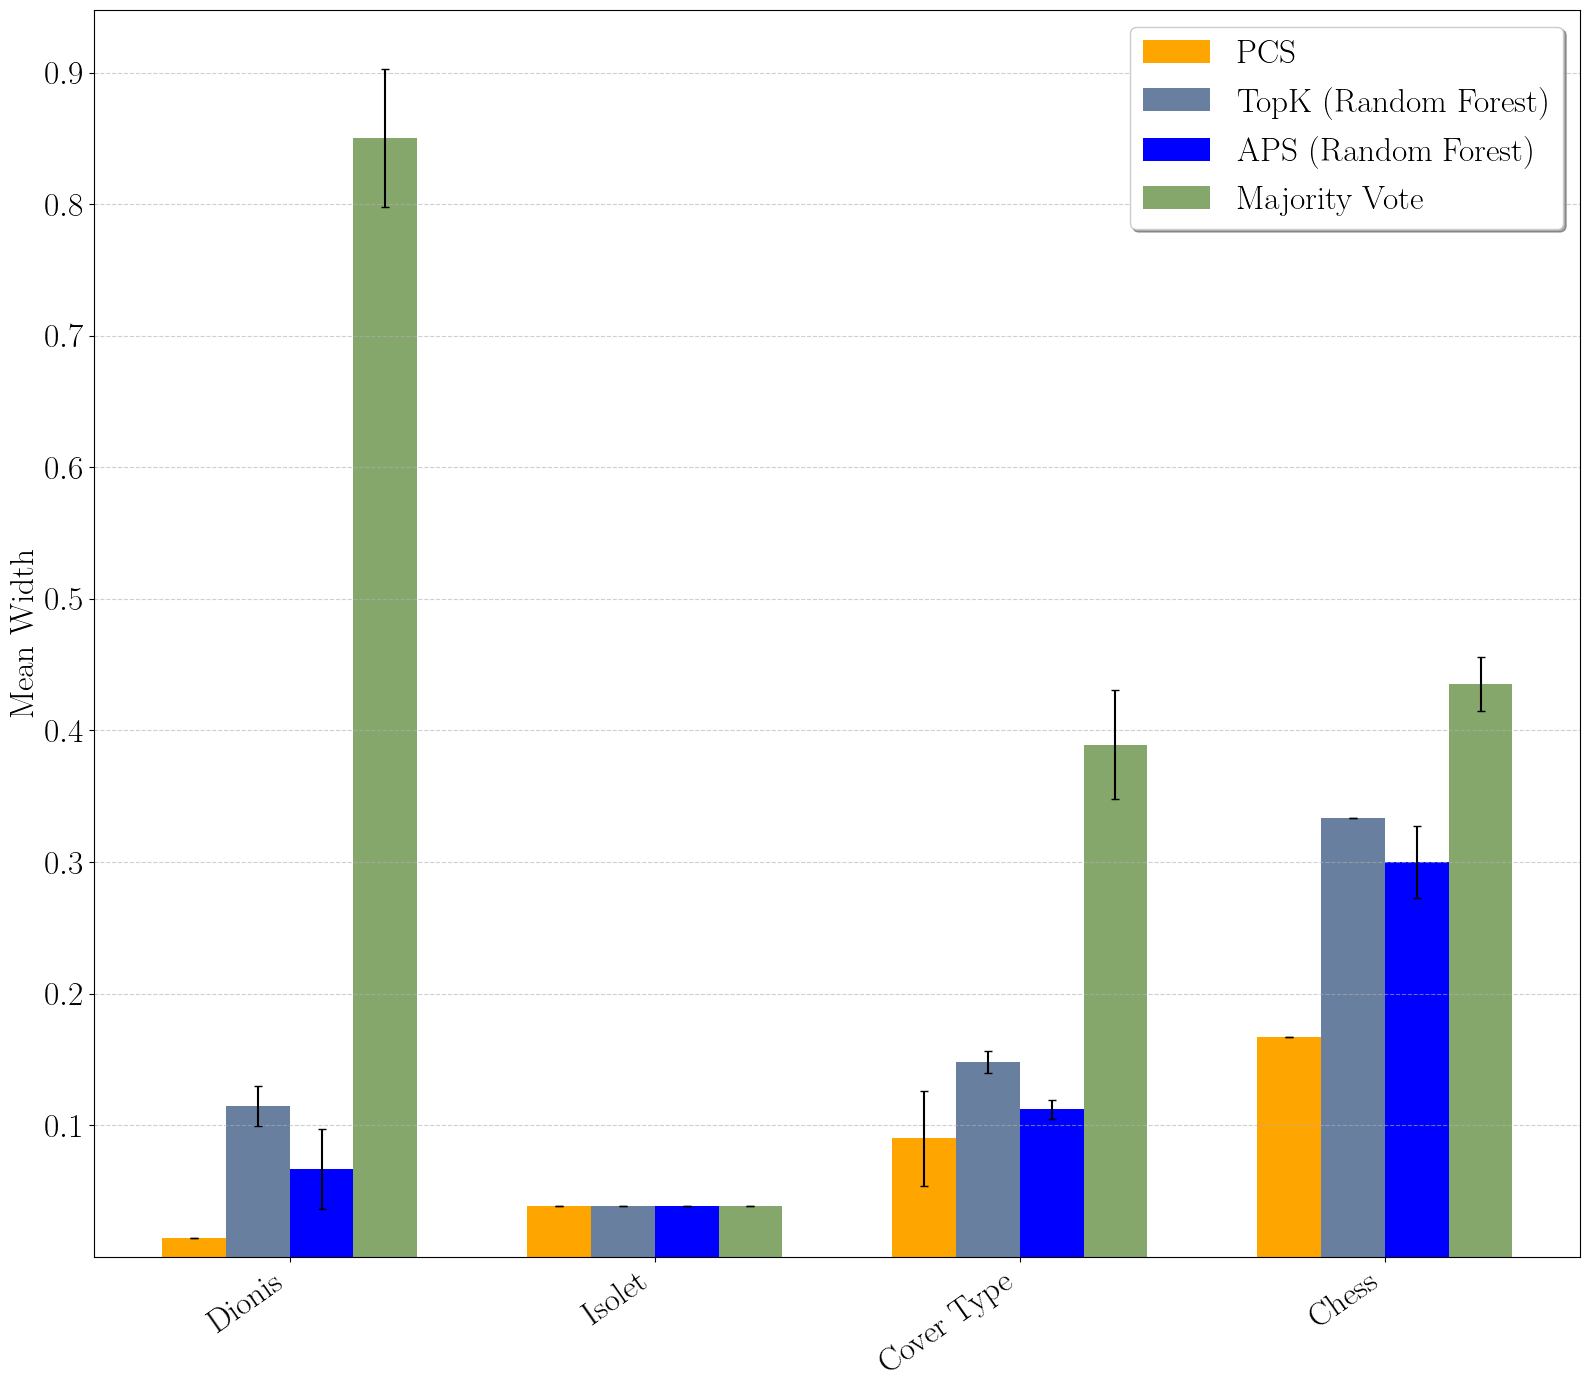

In [18]:
legend_dict = {'majority_vote': 'Majority Vote', 'split_conformal_topk_RandomForest': 'TopK (Random Forest)', 'split_conformal_raps_RandomForest': 'RAPS (Random Forest)',
                'split_conformal_aps_RandomForest': 'APS (Random Forest)', 'pcs_oob': 'PCS'}
data_dict = {'data_chess': 'Chess', 'data_cover_type': 'Cover Type', 'data_dionis': 'Dionis', 'data_isolet': 'Isolet',
             'data_walking': 'Walking'}
colors = {'PCS': 'orange', 'TopK (Random Forest)': '#697fa0', 'RAPS (Random Forest)': 'red', 'APS (Random Forest)': 'Blue', 'Majority Vote': '#86a76c'}
methods_to_plot = [
    #('pcs_uq', ''),
    ('pcs_oob', ''),
    ('split_conformal_topk', 'RandomForest'),
    #('split_conformal_raps', 'RandomForest'),
    ('split_conformal_aps', 'RandomForest'),
    ('majority_vote', '')
]

# Set up transparency values
alpha_values = {}
for method, _ in methods_to_plot:
    if method == 'pcs_oob':
        alpha_values[method] = 1.0
    else:
        alpha_values[method] = 1.0
              
plt.figure(figsize=(16, 14), dpi=100)
# Add text next to each bar displaying % improve of PCS OOB over next best conformal method


# Get data for plotting
plot_data = []
plot_errors = []
labels = []
df = df.sort_values(by = ('pcs_oob','', 'median_width_scaled_mean'), ascending=True)
df_plot = df.iloc[:-1, :]
for method, estimator in methods_to_plot:
    method_name = f"{method}_{estimator}" if estimator else method
    means = df_plot.loc[:, (method, estimator, 'median_width_scaled_mean')].values
    stds = df_plot.loc[:, (method, estimator, 'median_width_scaled_std')].values
    plot_data.append(means)
    plot_errors.append(stds)
    labels.append(legend_dict[method_name])

# Convert to numpy arrays
plot_data = np.array(plot_data)
plot_errors = np.array(plot_errors)

# Set up bar positions
n_methods = len(methods_to_plot)
n_datasets = len(df_plot.index)
width = 0.35  # Width of bars
x = np.arange(n_datasets)

# Create color palette
#colors = plt.cm.Set3(np.linspace(0, 1, n_methods))
# Increase spacing between x-ticks by adjusting figure size and/or x positions

# Increase spacing between x positions
x = np.arange(n_datasets) * 2.0 # Multiply by 1.5 to increase gaps between bars

# Plot bars
for i in range(n_methods):
    plt.bar(x + i*width - (n_methods-1)*width/2, 
            plot_data[i], 
            width,
            label=labels[i],
            yerr=plot_errors[i],
            capsize=3,
            alpha=alpha_values[methods_to_plot[i][0]],
            color=colors[labels[i]])


# Customize plot
#plt.xlabel('Dataset', fontsize=16)
plt.ylabel('Mean Width', fontsize=24)
#plt.yscale('log')
#plt.title('Prediction Interval Widths by Method and Dataset', fontsize=14, fontweight='bold', pad=20)

# Set x-axis ticks and labels
plt.xticks(x, [data_dict[dataset] for dataset in df_plot.index], rotation=35, ha='right', fontsize=24)
plt.yticks(ticks = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], fontsize=24)

# Add some style elements
#plt.gca().set_facecolor('#f8f9fa')
plt.gca().spines['top'].set_visible(True)
plt.gca().spines['right'].set_visible(True)
plt.legend(frameon=True, fancybox=True, shadow=True, loc='upper right', fontsize=24, ncol=4)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()